In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# dataset 분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from tpot import TPOTClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal 
import pickle


import sklearn.metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
dataframe_hrv = pd.read_csv("/content/drive/MyDrive/MCA/train.csv")
dataframe_hrv = dataframe_hrv.reset_index(drop=True)
display(dataframe_hrv.head(5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [ ]:
selected_x_columns = ['HR', 'RMSSD', 'pNN50', 'TP', 'VLF', 'LF', 'HF','LF_HF']
X = dataframe_hrv[selected_x_columns]
display(X.head(5))

,HR,RMSSD,pNN50,TP,VLF,LF,HF,LF_HF
0,69.499952,15.554505,0.533333,3686.666157,2661.894136,1009.249419,15.522603,65.018055
1,64.363150,12.964439,0.000000,3006.487251,2314.265450,690.113275,2.108525,327.296635
2,67.450066,16.305279,0.200000,2685.879461,1373.887112,1298.222619,13.769729,94.280910
3,68.809562,15.720468,0.133333,3434.520980,2410.357408,1005.981659,18.181913,55.328701
4,74.565728,19.213819,0.200000,2621.175204,1151.177330,1421.782051,48.215822,29.487873


In [ ]:
newDataframe_hrv = pd.read_csv("../input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/data/final/test.csv")
newdataframe_hrv = dataframe_hrv.reset_index(drop=True)
new_selected_x_columns = ['HR', 'RMSSD', 'pNN50', 'TP', 'VLF', 'LF', 'HF','LF_HF']
newX = newDataframe_hrv[selected_x_columns]
display(newX.head(5))

-----------------------------start----------------------------

In [2]:
import os
import sklearn.pipeline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
#NOTE: This code is just a quick and dirty proof of concept. Our implimentation in the paper is completely different



In [3]:
def load_train_set():
    #Loading a hdf5 file is much much faster
    return pd.read_csv('/content/drive/MyDrive/MCA/train.csv')
def load_test_set():
    #Loading a hdf5 file is much much faster
    return pd.read_csv('/content/drive/MyDrive/MCA/test.csv')

--------------------------------------------------------------------------------------------------------------

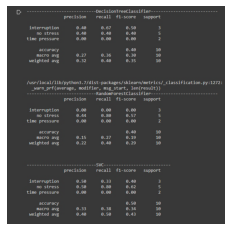

<Figure size 720x720 with 0 Axes>

In [4]:
#성능이 안나오는 상황 출력
#HR 만 이용하거나 row수를 확 줄였을때는 성능이 나오지않음
img_dir='/content/drive/MyDrive/MCA/'
os.listdir(img_dir)
from matplotlib import pyplot as plt
from keras_preprocessing import image
img = image.load_img(os.path.join(img_dir,'10col.jpg'))
plt.imshow(img)
plt.grid(False)
plt.axis('off')
plt.figure(figsize=(10,10))
plt.show()



In [5]:
#select = SelectKBest(k=5)
#data loader
train =load_train_set()
test = load_test_set()
target = 'condition'

hrv_features = list(train)


In [7]:
hrv_features = [x for x in hrv_features if x  in ['HR','RMSSD','pNN50','TP','VLF','LF','HF','LF_HF']]

X_train= train[hrv_features]
y_train= train[target]
X_test = test[hrv_features]
y_test = test[target]
classifiers = [
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=100, max_features='log2', n_jobs=-1),
                SVC(C=20, kernel='rbf'),   
                ]


In [8]:
# X_test data format
X_test

,RMSSD,HR,pNN50,VLF,LF,HF,TP,LF_HF
0,12.361264,84.121868,0.000000,1016.073759,615.914573,66.617057,1698.605390,9.245599
1,19.298880,71.478642,0.200000,765.518473,1566.866135,26.500086,2358.884694,59.126832
2,21.342715,63.874293,1.800000,2237.739905,2074.868884,16.024935,4328.633724,129.477524
3,11.771814,74.330531,0.533333,2330.980957,505.886664,17.581470,2854.449091,28.773854
4,13.357748,82.092049,0.666667,4750.624447,524.203971,35.199054,5310.027472,14.892559
...,...,...,...,...,...,...,...,...
41028,18.592177,54.234182,0.266667,4130.820437,969.550262,0.347514,5100.718213,2789.962965
41029,20.623727,76.416971,3.533333,7163.989622,1250.595884,118.014128,8532.599635,10.597001
41030,21.699038,90.254005,4.000000,3946.374071,1911.676588,216.200973,6074.251632,8.842128
41031,11.280586,79.313782,0.266667,732.516968,563.466628,41.797177,1337.780773,13.480973


In [28]:
# 임의의 한명 데이터 출력해보기
a=[]
for i in range(8):
    a.append(X_test.iloc[4,i])

print(a)

[13.357747564687882, 82.09204908041558, 0.6666666666666666, 4750.624446693404, 524.2039711651869, 35.19905392725498, 5310.027471785846, 14.892558540026279]


In [38]:
#fitting
model = DecisionTreeClassifier(max_depth=30, random_state=2).fit(X_train,y_train)
print(f'train 성능 :{model.score(X_train,y_train)}')
print(f'test 성능 : {model.score(X_test,y_test)}')
 

train 성능 :1.0
test 성능 : 0.9986839860600005


In [11]:
#  for clf in classifiers:
#         name = str(clf).split('(')[0]
#         # if 'SVC' == name:
#         #     # Normalize the attribute values to mean=0 and variance=1
#         #     from sklearn.preprocessing import StandardScaler
#         #     scaler = StandardScaler()
#         #     scaler.fit(X_train)
#         #     X_train = scaler.transform(X_train)
#         #     X_test = scaler.transform(X_test)
#         #clf = RandomForestClassifier()
#         steps = [('feature_selection', select),
#              ('model', clf)]
#         pipeline = sklearn.pipeline.Pipeline(steps)
#         pipeline.fit(X_train, y_train)
#         y_prediction = pipeline.predict(X_test)
#         print("----------------------------{0}---------------------------".format(name))
#         print(sklearn.metrics.classification_report(y_test, y_prediction))
#         print()
#         print()

# sklearn - porter 설치후 실행

In [12]:
pip install sklearn-porter==0.7.4

     |████████████████████████████████| 144 kB 11.6 MB/s 


In [14]:
from sklearn_porter import Porter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.weight_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. Th

In [17]:
f = open("output.txt", 'w')
f.write(output)
f.close()

In [15]:

porter = Porter(model, language='java')
output = porter.export(embed_data=True)
print(output)

class DecisionTreeClassifier {

    private static int findMax(int[] nums) {
        int index = 0;
        for (int i = 0; i < nums.length; i++) {
            index = nums[i] > nums[index] ? i : index;
        }
        return index;
    }

    public static int predict(double[] features) {
        int[] classes = new int[3];
            
        if (features[1] <= 81.69158935546875) {
            if (features[1] <= 73.49908065795898) {
                if (features[4] <= 1137.2798461914062) {
                    if (features[1] <= 64.46585464477539) {
                        if (features[3] <= 1815.75048828125) {
                            if (features[1] <= 60.993032455444336) {
                                classes[0] = 0; 
                                classes[1] = 0; 
                                classes[2] = 1202; 
                            } else {
                                if (features[2] <= 0.5000000149011612) {
                                    if (features[

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pip list | grep scikit-learn

scikit-learn                  0.22.2.post1


In [16]:
a='0.22.2'.split('.')

print(type(int(a[0])))


 sklearn_ver =  '0.22.2'.split('.')
        sklearn_ver[0] = int(sklearn_ver[0])
        sklearn_ver[1] = int(sklearn_ver[1])
        sklearn_ver[2] = int(sklearn_ver[2])

<class 'int'>
